In [2]:
import pandas as pnd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras

tf.config.set_visible_devices([], 'GPU')

#Définition de la longueur et de la largeur de l'image
LONGUEUR_IMAGE = 28
LARGEUR_IMAGE = 28

#Chargement des images
observations_entrainement = pnd.read_csv('datas/fashion-mnist_train.csv')

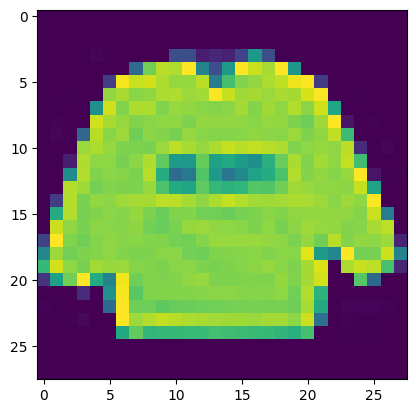

In [3]:
#On exclut la première colonne (les labels) pour constituer un tableau de pixels
X = np.array(observations_entrainement.iloc[:, 1:])

premiereImage = X[0]
premiereImage = premiereImage.reshape([LONGUEUR_IMAGE,LARGEUR_IMAGE])
plt.imshow(premiereImage)
plt.show()

In [4]:
#On crée des catégories à l'aide du module Keras
y = keras.utils.to_categorical(np.array(observations_entrainement.iloc[:,0]))
#Répartition des données d'entrainement en données d'apprentissage et données de validation
#80% de donnée d'apprentissage et 20% de donnée de validation
X_apprentissage, X_validation, y_apprentissage, y_validation = train_test_split(X, y, test_size=0.2, random_state=13)

In [5]:
# On redimensionne les images au format 28*28 et on réalise un scaling sur les données des pixels
X_apprentissage = X_apprentissage.reshape(X_apprentissage.shape[0], 
                                          LARGEUR_IMAGE, 
                                          LONGUEUR_IMAGE, 1)
X_apprentissage = X_apprentissage.astype('float32')
X_apprentissage /= 255

X_validation = X_validation.reshape(X_validation.shape[0], 
                                    LARGEUR_IMAGE, 
                                    LONGUEUR_IMAGE, 1)
X_validation = X_validation.astype('float32')
X_validation /= 255

In [6]:
#Preparation des données de tests
observations_test = pnd.read_csv('datas/fashion-mnist_test.csv')
X_test = np.array(observations_test.iloc[:, 1:])
y_test = tf.keras.utils.to_categorical(np.array(observations_test.iloc[:, 0]))
X_test = X_test.reshape(X_test.shape[0], 
                        LARGEUR_IMAGE, 
                        LONGUEUR_IMAGE, 1)
X_test = X_test.astype('float32')
X_test /= 255

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Input
from keras.layers import Conv2D, MaxPooling2D

# On spécifie les dimensions de l'image d'entrée
dimentionImage = (LARGEUR_IMAGE, LONGUEUR_IMAGE, 1)

# On crée le réseau de neurones couche par couche
reseauNeurone1Convolution = Sequential()

# Ajout de la couche d'entrée
reseauNeurone1Convolution.add(Input(shape=dimentionImage))

#1- Ajout de la couche de convolution comportant
# 32 filtres de de taille 3x3 (Kernel) parcourant l'image
# Une fonction d'activation de type ReLU (Rectified Linear Activation)
# Une image d'entrée de 28px * 28 px 
reseauNeurone1Convolution.add(Conv2D(32, 
                                     kernel_size=(3, 3), 
                                     activation='relu'))

#2- Définition de la fonction de pooling avec une fenêtre de 2px sur 2 px
reseauNeurone1Convolution.add(MaxPooling2D(pool_size=(2, 2)))

#3- Ajout d'une fonction d'ignorance
reseauNeurone1Convolution.add(Dropout(0.2))

#5 - On transforme en une seule ligne
reseauNeurone1Convolution.add(Flatten())

#6 - Ajout d'un réseau de neurones composé de 128 neurones avec 
# une fonction d'activation de type ReLU
reseauNeurone1Convolution.add(Dense(128, activation='relu'))

#7 - Ajout d'un réseau de neurones composé de 10 neurones avec une 
# fonction d'activation de type softmax
reseauNeurone1Convolution.add(Dense(10, activation='softmax'))

In [8]:
reseauNeurone1Convolution.compile(loss=keras.losses.categorical_crossentropy, 
                                  optimizer=tf.keras.optimizers.Adam(), 
                                  metrics=['accuracy'])

In [9]:
historique_apprentissage = reseauNeurone1Convolution.fit(
    X_apprentissage, 
    y_apprentissage,
    batch_size=256,
    epochs=10,
    verbose=1,
    validation_data=(X_validation, y_validation))

Epoch 1/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 13s 59ms/step - accuracy: 0.8016 - loss: 0.5645 - val_accuracy: 0.8561 - val_loss: 0.4125
Epoch 2/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 11s 57ms/step - accuracy: 0.8675 - loss: 0.3786 - val_accuracy: 0.8801 - val_loss: 0.3483
Epoch 3/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 10s 56ms/step - accuracy: 0.8834 - loss: 0.3293 - val_accuracy: 0.8858 - val_loss: 0.3278
Epoch 4/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 11s 58ms/step - accuracy: 0.8945 - loss: 0.2984 - val_accuracy: 0.8935 - val_loss: 0.3015
Epoch 5/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 11s 56ms/step - accuracy: 0.9020 - loss: 0.2780 - val_accuracy: 0.8937 - val_loss: 0.2999
Epoch 6/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 11s 57ms/step - accuracy: 0.9069 - loss: 0.2629 - val_accuracy: 0.9013 - val_loss: 0.2742
Epoch 7/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 11s 56ms/step - accuracy: 0.9112 - loss: 0.2476 - val_accuracy: 0.9038 - val_loss: 0.2665
Epoch 8/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 11s 57ms/step - accuracy: 0.9165 - loss: 0.2332 - 

In [10]:
evaluation = reseauNeurone1Convolution.evaluate(X_test, y_test, verbose=0)
print('Erreur:', evaluation[0])
print('Précision:', evaluation[1])

Erreur: 0.23528510332107544
Précision: 0.9162999987602234


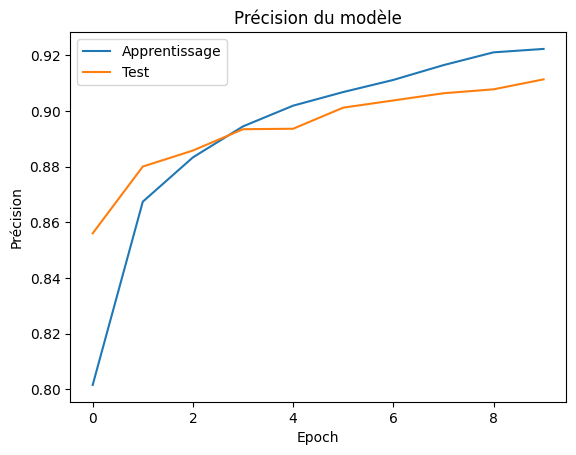

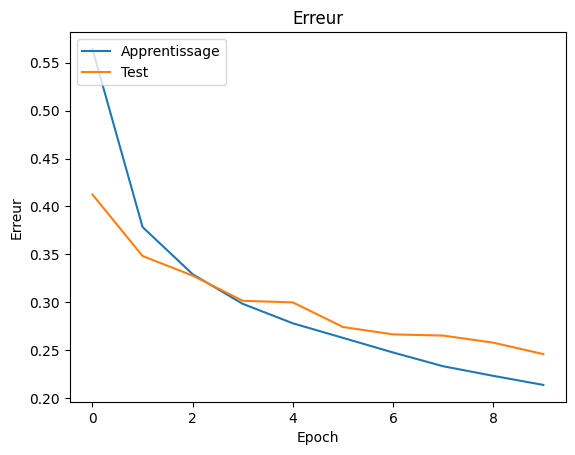

In [11]:
plt.plot(historique_apprentissage.history['accuracy'])
plt.plot(historique_apprentissage.history['val_accuracy'])
plt.title('Précision du modèle')
plt.ylabel('Précision')
plt.xlabel('Epoch')
plt.legend(['Apprentissage', 'Test'], loc='upper left')
plt.show()
# Plot training & validation loss values
plt.plot(historique_apprentissage.history['loss'])
plt.plot(historique_apprentissage.history['val_loss'])
plt.title('Erreur')
plt.ylabel('Erreur')
plt.xlabel('Epoch')
plt.legend(['Apprentissage', 'Test'], loc='upper left')
plt.show()

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

generateur_images = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=8,
    width_shift_range=0.08,
    shear_range=0.3,
    height_shift_range=0.08,
    zoom_range=0.08)

In [13]:
nouvelles_images_apprentissage = generateur_images.flow(
    X_apprentissage, 
    y_apprentissage,
    batch_size=256)

nouvelles_images_validation = generateur_images.flow(
    X_validation, 
    y_validation,
    batch_size=256)

historique_apprentissage = reseauNeurone1Convolution.fit(
    nouvelles_images_apprentissage,
    steps_per_epoch=48000//256,
    epochs=50,
    validation_data=nouvelles_images_validation,
    validation_steps=12000//256,
    verbose=1 )

evaluation = reseauNeurone1Convolution.evaluate(X_test, y_test, verbose=0)

print('Erreur :', evaluation[0])
print('Précision:', evaluation[1])

Epoch 1/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 25s 132ms/step - accuracy: 0.8255 - loss: 0.4664 - val_accuracy: 0.8419 - val_loss: 0.4222
Epoch 2/50
  1/187 ━━━━━━━━━━━━━━━━━━━━ 12s 65ms/step - accuracy: 0.8125 - loss: 0.5423

/home/vscode/.local/lib/python3.12/site-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


187/187 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - accuracy: 0.8125 - loss: 0.5423 - val_accuracy: 0.8399 - val_loss: 0.4241
Epoch 3/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 25s 131ms/step - accuracy: 0.8471 - loss: 0.4143 - val_accuracy: 0.8508 - val_loss: 0.3944
Epoch 4/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.8516 - loss: 0.4207 - val_accuracy: 0.8533 - val_loss: 0.3968
Epoch 5/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 24s 129ms/step - accuracy: 0.8535 - loss: 0.3915 - val_accuracy: 0.8583 - val_loss: 0.3756
Epoch 6/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.8633 - loss: 0.3604 - val_accuracy: 0.8597 - val_loss: 0.3778
Epoch 7/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 23s 125ms/step - accuracy: 0.8604 - loss: 0.3781 - val_accuracy: 0.8632 - val_loss: 0.3646
Epoch 8/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.8672 - loss: 0.3383 - val_accuracy: 0.8658 - val_loss: 0.3642
Epoch 9/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 22s 118ms/step - accuracy: 0.8640 - loss: 0.3646 - val_accurac

In [15]:
#Sauvegarde du modèle
# Serialisation du modèle 
model_json = reseauNeurone1Convolution.to_json() 
with open("modele/modele.json", "w") as json_file:
    json_file.write(model_json)
    
# Serialisation des poids
reseauNeurone1Convolution.save_weights("modele/modele.weights.h5")
print("Modèle sauvegardé !")

Modèle sauvegardé !


In [17]:
from keras.layers import BatchNormalization

reseauNeurones4Convolution = Sequential()

reseauNeurones4Convolution.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=dimentionImage))
reseauNeurones4Convolution.add(BatchNormalization())
reseauNeurones4Convolution.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
reseauNeurones4Convolution.add(BatchNormalization())
reseauNeurones4Convolution.add(MaxPooling2D(pool_size=(2, 2)))
reseauNeurones4Convolution.add(Dropout(0.25))

reseauNeurones4Convolution.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
reseauNeurones4Convolution.add(BatchNormalization())
reseauNeurones4Convolution.add(Dropout(0.25))

reseauNeurones4Convolution.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
reseauNeurones4Convolution.add(BatchNormalization())
reseauNeurones4Convolution.add(MaxPooling2D(pool_size=(2, 2)))
reseauNeurones4Convolution.add(Dropout(0.25))

reseauNeurones4Convolution.add(Flatten())
reseauNeurones4Convolution.add(Dense(512, activation='relu'))
reseauNeurones4Convolution.add(BatchNormalization())
reseauNeurones4Convolution.add(Dropout(0.5))

reseauNeurones4Convolution.add(Dense(128, activation='relu'))
reseauNeurones4Convolution.add(BatchNormalization())
reseauNeurones4Convolution.add(Dropout(0.5))

reseauNeurones4Convolution.add(Dense(10, activation='softmax'))

In [18]:
reseauNeurones4Convolution.compile(loss=keras.losses.categorical_crossentropy, 
                                  optimizer=tf.keras.optimizers.Adam(), 
                                  metrics=['accuracy'])

historique_apprentissage = reseauNeurones4Convolution.fit(
    X_apprentissage, 
    y_apprentissage,
    batch_size=256,
    epochs=10,
    verbose=1,
    validation_data=(X_validation, y_validation))

Epoch 1/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 78s 383ms/step - accuracy: 0.7400 - loss: 0.7435 - val_accuracy: 0.1657 - val_loss: 3.2245
Epoch 2/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 69s 368ms/step - accuracy: 0.8446 - loss: 0.4368 - val_accuracy: 0.4712 - val_loss: 1.9428
Epoch 3/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 69s 368ms/step - accuracy: 0.8719 - loss: 0.3627 - val_accuracy: 0.7777 - val_loss: 0.6873
Epoch 4/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 71s 377ms/step - accuracy: 0.8846 - loss: 0.3262 - val_accuracy: 0.8947 - val_loss: 0.2929
Epoch 5/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 77s 407ms/step - accuracy: 0.8928 - loss: 0.3030 - val_accuracy: 0.8995 - val_loss: 0.2729
Epoch 6/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 72s 384ms/step - accuracy: 0.9010 - loss: 0.2795 - val_accuracy: 0.8972 - val_loss: 0.2698
Epoch 7/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 77s 411ms/step - accuracy: 0.9060 - loss: 0.2654 - val_accuracy: 0.9122 - val_loss: 0.2505
Epoch 8/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 75s 399ms/step - accuracy: 0.9086 - loss: 0

In [19]:
#Sauvegarde du modèle
# Serialisation du modèle 
model_json = reseauNeurones4Convolution.to_json() 
with open("modele/modele.json", "w") as json_file:
    json_file.write(model_json)
    
# Serialisation des poids
reseauNeurones4Convolution.save_weights("modele/modele.weights.h5")
print("Modèle sauvegardé !")

Modèle sauvegardé !
